<a href="https://colab.research.google.com/github/hyunjung28/cakd5_lecture/blob/main/DL_using_convnets_with_small_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras==2.3.1
!pip install tensorflow==2.2.0

In [ ]:
!pip uninstall keras



Found existing installation: Keras 2.3.1
Uninstalling Keras-2.3.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Keras-2.3.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/docs/*
    /usr/local/lib/python3.7/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.7/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.3.1


In [ ]:
!pip install h5py 
!pip install typing-extensions 
!pip install wheel

In [ ]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [ ]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

소규모 데이터셋에서 컨브넷 훈련하기

4000개의 강아지 고양이 사진으로 구성된 데이터셋을 train 2000, validation 1000, test 1000개로 분리하여 사용
- 과대 적합 여부 확인
- 데이터 증식을 통한 네트워크 성능 개선
- 사전 훈련된 네트워크를 활용



In [ ]:
import os, shutil

original_dataset_dir ='/content/drive/MyDrive/cakd5_colab/M9_딥러닝알고리즘구현/cats_and_dogs/train'

base_dir = '/content/drive/MyDrive/cakd5_colab/M9_딥러닝알고리즘구현/datasets/cats_and_'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_cats_dir,fname)
  shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_cats_dir,fname)
  shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_cats_dir,fname)
  shutil.copyfile(src,dst)

  fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src,dst)

FileExistsError: ignored

In [ ]:
# 코드 5-4 훈련, 검증, 테스트 폴더로 이미지 복사하기
import os, shutil

# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './cats_dogs_'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
import os, shutil
base_dir = '/content/drive/MyDrive/cakd5_colab/M9_딥러닝알고리즘구현/cats_and_dogs_small'


# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')

test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')


# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')


# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')


# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


# 테스트용 고양이 사진 디렉
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))


훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


## 작은 데이터셋 문제에서 딥러닝의 타당성

딥러닝은 데이터가 풍부할 때만 작동한다는 말을 이따금 듣습니다. 부분적으로는 맞습니다. 딥러닝의 근본적인 특징은 훈련 데이터에서 특성 공학의 수작업 없이 흥미로운 특성을 찾을 수 있는 것입니다. 이는 훈련 샘플이 많아야만 가능합니다. 입력 샘플이 이미지와 같이 매우 고차원인 문제에서는 특히 그렇습니다.

- 많은 샘플이 의미하는 것은 상대적
- 복잡한 문제를 푸는 컨브넷을 수십 개의 샘플만을 사용해서 훈련하는 것은 불가능
- 컨브넷은 지역적이고 평행 이동으로 변하지 않는 특성을 학습하기 때문에 지각에 관한 문제에서 매우 효율적으로 데이터를 사용
- 매우 작은 이미지 데이터셋에서 어떤 종류의 특성 공학을 사용하지 않고 컨브넷을 처음부터 훈련해도 납득할 만한 결과를 만들 수 있다.

- 딥러닝 모델은 태생적으로 매우 다목적
- 대규모 데이터셋에서 훈련시킨 이미지 분류 모델이나 스피치-투-텍스트 모델을 조금만 변경해서 완전히 다른 문제에 재사용
- 특히 컴퓨터 비전에서는 (보통 ImageNet 데이터셋에서 훈련된) 사전 훈련된 모델들이 다운로드받을 수 있도록 많이 공개되어 있어서 매우 적은 데이터에서 강력한 비전 모델을 만드는데 사용할 수 있다.


In [ ]:
from keras import layers,models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))  #2*2에서 가장 큰 거 선택
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid')) #이진분류

In [ ]:
from keras import optimizers
import keras
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


제너레이터를 사용한 데이터에 모델을 훈련
- `fit_generator` 메서드는 `fit` 메서드와 동일하되 데이터 제너레이터를 사용할 수 있다.
- 이 메서드는 첫 번째 매개변수로 입력과 타깃의 배치를 끝없이 반환하는 파이썬 제너레이터를 기대한다.
- 데이터가 끝없이 생성되기 때문에 케라스 모델에 하나의 에포크를 정의하기 위해 제너레이터로부터 얼마나 많은 샘플을 뽑을 것인지 알려 주어야 한다. 
- `steps_per_epoch` 매개변수에서 이를 설정한다. 
- 제너레이터로부터 `steps_per_epoch` 개의 배치만큼 뽑은 다음, 즉 `steps_per_epoch` 횟수만큼 경사 하강법 단계를 실행한 다음에 훈련 프로세스는 다음 에포크로 넘어간다.
- 20개의 샘플이 하나의 배치이므로 2,000개의 샘플을 모두 처리할 때까지 100개의 배치를 뽑을 것이다.
- `fit_generator`를 사용할 때 `fit` 메서드와 마찬가지로 `validation_data` 매개변수를 전달할 수 있다. 
- 이 매개변수에는 데이터 제너레이터도 가능하지만 넘파이 배열의 튜플도 가능하다.
- `validation_data`로 제너레이터를 전달하면 검증 데이터의 배치를 끝없이 반환한다.
- 따라서 검증 데이터 제너레이터에서 얼마나 많은 배치를 추출하여 평가할지 `validation_steps` 매개변수에 지정해야 한다.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps =50
)

Epoch 1/30
100/100 [==============================] - 309s 3s/step - loss: 0.6903 - acc: 0.5465 - val_loss: 0.6932 - val_acc: 0.5130
Epoch 2/30
100/100 [==============================] - 15s 146ms/step - loss: 0.6604 - acc: 0.6105 - val_loss: 0.6954 - val_acc: 0.5210
Epoch 3/30
100/100 [==============================] - 14s 143ms/step - loss: 0.6169 - acc: 0.6580 - val_loss: 0.7472 - val_acc: 0.6010
Epoch 4/30
100/100 [==============================] - 14s 144ms/step - loss: 0.5719 - acc: 0.6965 - val_loss: 0.3952 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 14s 142ms/step - loss: 0.5399 - acc: 0.7205 - val_loss: 0.4964 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 14s 144ms/step - loss: 0.5125 - acc: 0.7480 - val_loss: 0.7276 - val_acc: 0.6590
Epoch 7/30
100/100 [==============================] - 14s 143ms/step - loss: 0.4918 - acc: 0.7515 - val_loss: 0.4571 - val_acc: 0.7040
Epoch 8/30
100/100 [==============================] - 14s

In [ ]:
model.save('/content/drive/MyDrive/cakd5_colab/M9_딥러닝알고리즘구현/cats_and_dogs_small_1.h5')

In [ ]:
from keras.models import load_model
model =load_model('/content/drive/MyDrive/cakd5_colab/M9_딥러닝알고리즘구현/cats_and_dogs_small_1.h5')

In [ ]:
model

#keras 및 tensorflow 를 사용한 이미지 데이터 증대방안
**https**://ichi.pro/ko/
keras-mich-tensorflowleul-sayonghan-imiji-deiteo-jeungdae-tamsaeg-184813206747204


[과제] 데이터 증식하여 모델 학습, 평가 및 시각화

In [ ]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

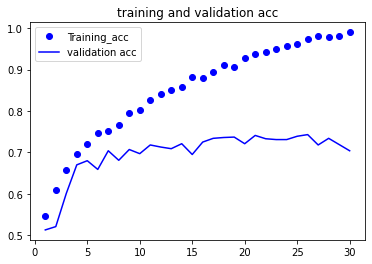

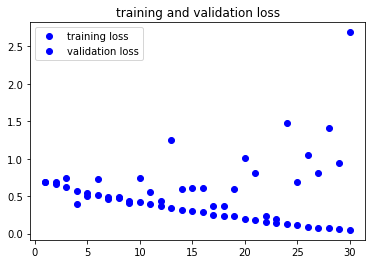

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training_acc')
plt.plot(epochs,val_acc,'b',label = 'validation acc')
plt.title('training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label = 'training loss')
plt.plot(epochs,val_loss,'bo',label = 'validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()